In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([27578, 27579, 27580, 27581, 27582, 27583, 27584, 27585]), array([67, 67, 67, 67, 67, 67, 67, 67]))
-11.52864845642314


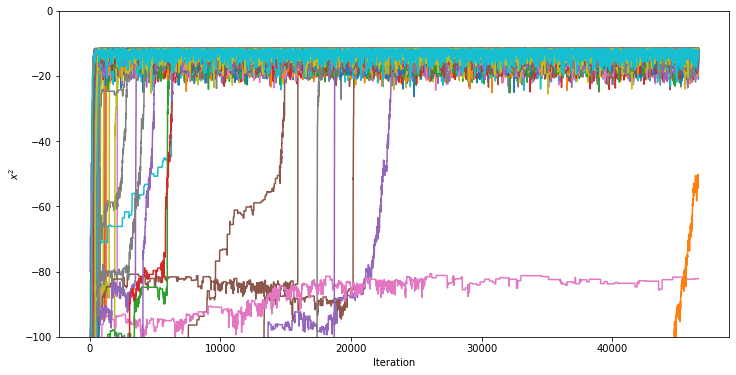

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

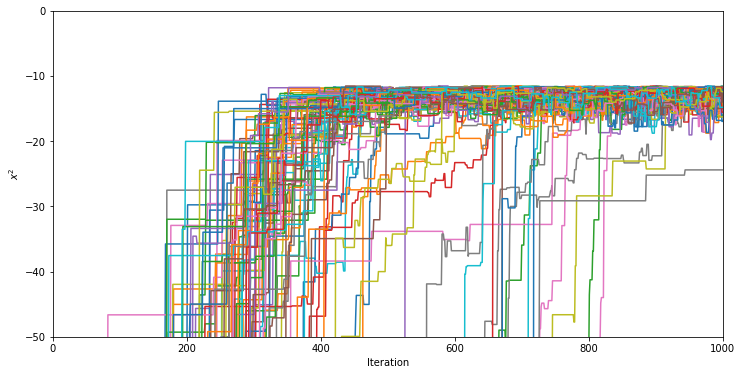

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([9088., 9209., 9067., 9049., 9088., 9107., 8868., 9018., 9177.,
       9133., 8907., 9150., 9200., 9157., 9059., 9166., 9240., 9287.,
       9159., 8958., 9214., 9152., 9126.,  334., 5583., 8915., 8863.,
       8821., 9330., 9112., 9212., 8958., 9054., 9156., 9051., 6663.,
       9178., 8972., 9016., 9082., 9216., 9177., 9129., 9267., 8945.,
       8941., 9080., 9184., 8967., 8137., 9051., 9326., 9163., 9090.,
       9117., 6262., 9219., 6099., 9000., 9267., 9069., 9132., 9123.,
       9147., 9087., 6853., 1396., 8852., 9004., 9161., 9178., 9090.,
       9048., 9207., 9028., 9059., 8948., 9146., 9226.,   89., 9204.,
       9103., 8481., 9069., 9164., 9146., 9231., 9083., 9097., 9213.,
       8979., 8979., 8996., 8466., 5921., 9076., 9011., 9072., 8837.,
       8927., 9283., 1165., 9033., 9100., 8685., 9239., 9242., 8749.,
       9002., 8872., 8988., 8984., 9205., 9218., 9195., 9121.,  771.,
       8675., 9248., 9243.])

[1056.91153164 1065.59486816  800.17922147  120.58880507]
flat chain shape: (600, 4)
flat log prob shape: (600,)


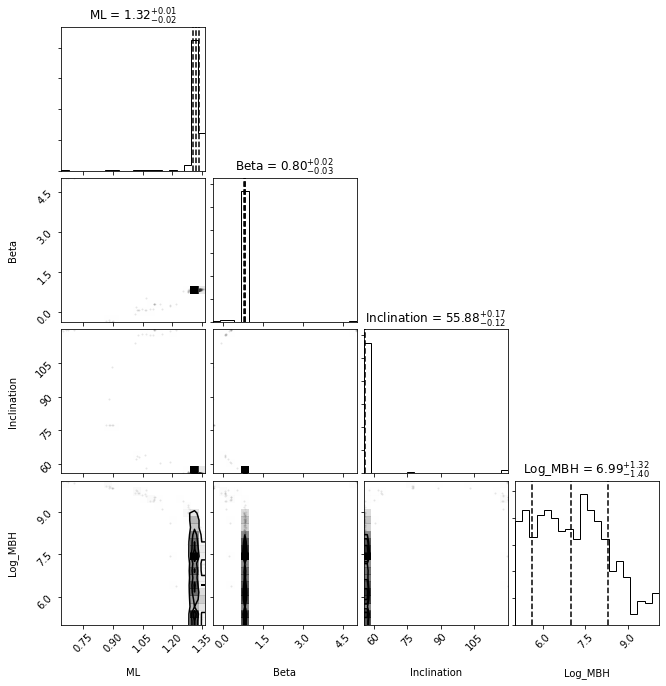

In [8]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=5000, flat=True, thin=8000 )
log_prob_samples = read.get_log_prob(discard=5000,flat=True, thin=8000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [9]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 932;
tau: [1056.91153164 1065.59486816  800.17922147  120.58880507]

In [10]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 932;
tau: [1056.91153164 1065.59486816  800.17922147  120.58880507]

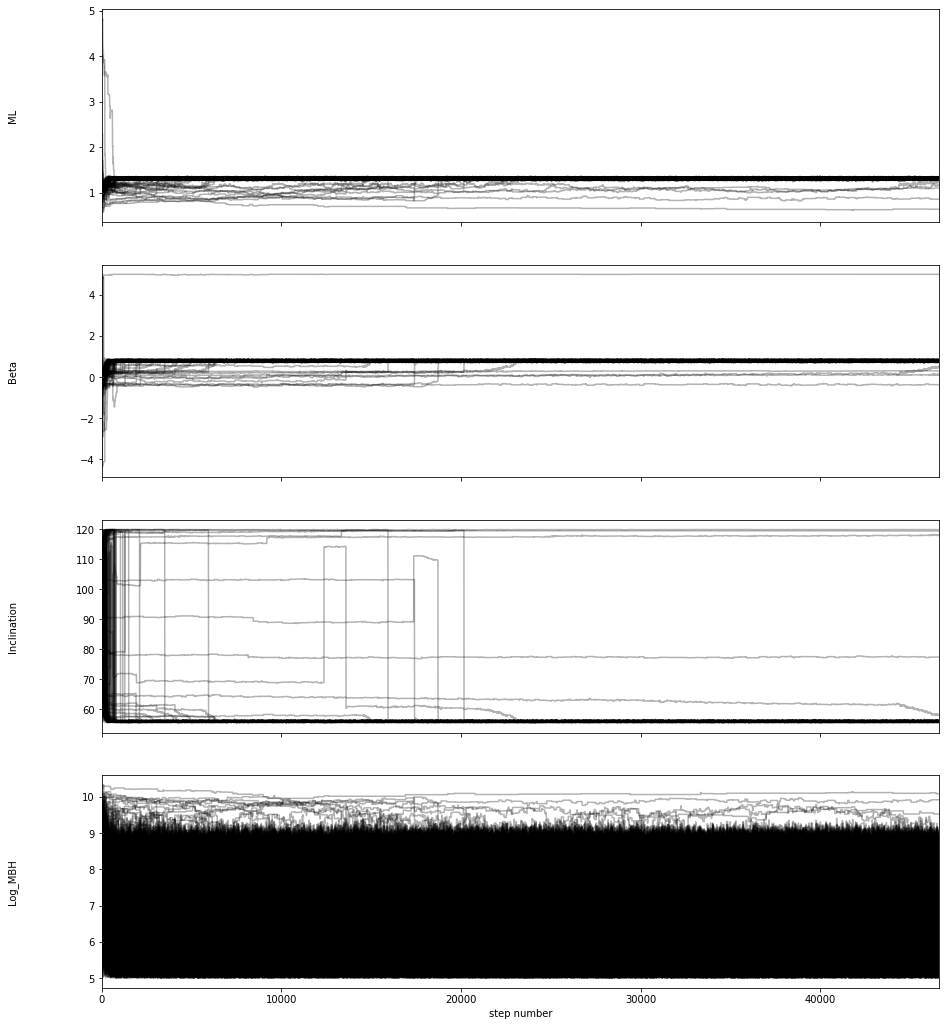

In [12]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [13]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

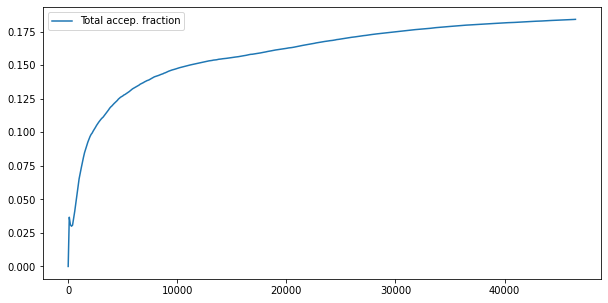

In [14]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

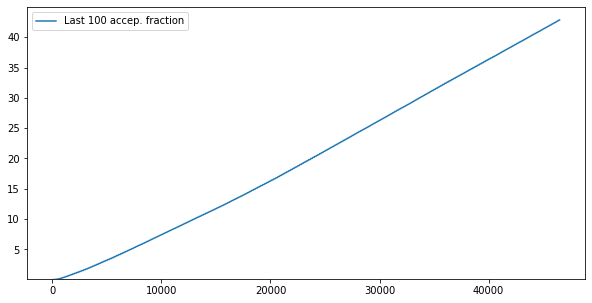

In [15]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [16]:
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM               #My class

In [17]:
xbin, ybin, goodbins, rms      = np.loadtxt("vrm.txt", unpack=True)   #dynamical data
surf_lum, sigma_lum, qobs_lum  = np.loadtxt("mge.txt", unpack=True)   #mge decomposition

goodbins = goodbins == 1
sigmapsf = np.array([0.6, 1.2])
normpsf  = np.array([0.7, 0.3])
pixsize  = 0.8

In [ ]:
ML=1.3180.013−0.016
Beta=0.8020.024−0.033
Inclination=55.8810.172−0.123
LogMBH=6.9921.315−1.399

In [18]:
#Best fit

best_ml      = 1.318
best_beta    = np.full_like(surf_lum, 0.802)
best_inc     = 55.881
best_log_mbh = 6.992

jam_axi_rms elapsed time sec: 1.11
inc=55.9 beta_z=0.80 M/L=1 BH=9.82e+06 chi2/DOF=0.0984
Total mass MGE: 7.379e+10


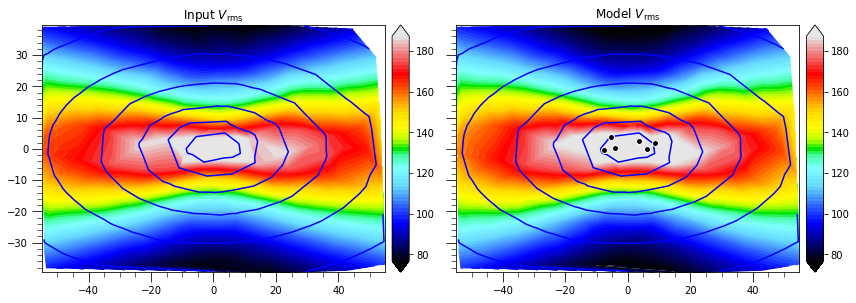

In [19]:
Jam_model = JAM(ybin=ybin, xbin=xbin, inc= best_inc, distance=16.5, mbh=10**(best_log_mbh), rms=rms,
                    beta=best_beta, normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron")
plt.tight_layout()

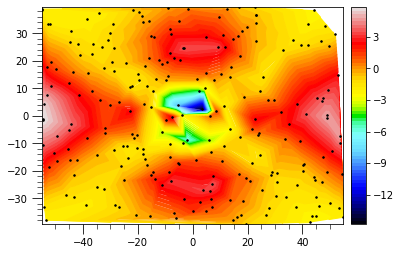

In [20]:
#Plot difference between data and my model
diff = rms - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)

In [21]:
print("Chi2/DOF:",chi2)
print("Chi2 Total", chi2T)

Chi2/DOF: 0.09844571470063519
Chi2 Totoal 24.020754386954987
